In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set()
plt.gcf().subplots_adjust(bottom=0.15)
plt.tight_layout()

In [3]:
Fortune10_2016_file = "./Resources/Fortune10_2016.csv"
Fortune10_2016 = pd.read_csv(Fortune10_2016_file)
Fortune10_2016.dropna(axis=1, how='all')

,Rank,Company,Ticker,Revenues
0,1,Walmart,WMT,482130
1,2,Exxon Mobil,XOM,246204
2,3,Apple,APPL,233715
3,4,Berkshire Hathaway,BRK.B,210821
4,5,McKesson,MCK,181241
5,6,UnitedHealth Group,UNH,157107
6,7,CVS Health,CVS,153290
7,8,General Motors,GM,152356
8,9,Ford Motor,F,149558
9,10,AT&T,T,146801


In [4]:
Fortune10_2017_file = "./Resources/Fortune10_2017.csv"
Fortune10_2017 = pd.read_csv(Fortune10_2017_file)
Fortune10_2017.dropna(axis=1, how='all')

,Rank,Company,Ticker,Revenues,Profits
0,1,Walmart,WMT,485873,13643
1,2,Berkshire Hathaway,BRKA,223604,24074
2,3,Apple,AAPL,215639,45687
3,4,Exxon Mobil,XOM,205004,7840
4,5,McKesson,MCK,192487,2258
5,6,UnitedHealth Group,UNH,184840,7017
6,7,CVS Health,CVS,177526,5317
7,8,General Motors,GM,166380,9427
8,9,AT&T,T,163786,12976
9,10,Ford Motor,F,151800,4596


In [13]:
stock_table = pd.merge(Fortune10_2016, Fortune10_2017, on="Company")
stock_table

,Rank_x,Company,Ticker_x,Revenues_x,Rank_y,Ticker_y,Revenues_y,Profits
0,1,Walmart,WMT,482130,1,WMT,485873,13643
1,2,Exxon Mobil,XOM,246204,4,XOM,205004,7840
2,3,Apple,APPL,233715,3,AAPL,215639,45687
3,4,Berkshire Hathaway,BRK.B,210821,2,BRKA,223604,24074
4,5,McKesson,MCK,181241,5,MCK,192487,2258
5,6,UnitedHealth Group,UNH,157107,6,UNH,184840,7017
6,7,CVS Health,CVS,153290,7,CVS,177526,5317
7,8,General Motors,GM,152356,8,GM,166380,9427
8,9,Ford Motor,F,149558,10,F,151800,4596
9,10,AT&T,T,146801,9,T,163786,12976


In [79]:
stock_transformed = stock_table.rename(columns={"Ticker_x" : "Ticker",
       "Rank_x": "Rank_2016",
        "Revenues_x" : "Revenues_2016",
       "Rank_y" : "Rank_2017",
       "Ticker_y" : "Ticker2",
       "Revenues_y" : "Revenues_2017"})
stock_transformed = stock_transformed.drop(columns={"Profits", "Ticker2"})
stock_transformed

,Rank_2016,Company,Ticker,Revenues_2016,Rank_2017,Revenues_2017
0,1,Walmart,WMT,482130,1,485873
1,2,Exxon Mobil,XOM,246204,4,205004
2,3,Apple,APPL,233715,3,215639
3,4,Berkshire Hathaway,BRK.B,210821,2,223604
4,5,McKesson,MCK,181241,5,192487
5,6,UnitedHealth Group,UNH,157107,6,184840
6,7,CVS Health,CVS,153290,7,177526
7,8,General Motors,GM,152356,8,166380
8,9,Ford Motor,F,149558,10,151800
9,10,AT&T,T,146801,9,163786


In [80]:
stock_revenue_compare = stock_transformed.drop(columns={"Rank_2016", "Rank_2017"})
stock_revenue_compare

,Company,Ticker,Revenues_2016,Revenues_2017
0,Walmart,WMT,482130,485873
1,Exxon Mobil,XOM,246204,205004
2,Apple,APPL,233715,215639
3,Berkshire Hathaway,BRK.B,210821,223604
4,McKesson,MCK,181241,192487
5,UnitedHealth Group,UNH,157107,184840
6,CVS Health,CVS,153290,177526
7,General Motors,GM,152356,166380
8,Ford Motor,F,149558,151800
9,AT&T,T,146801,163786


In [81]:
x_axis = np.arange(len(stock_revenue_compare))
tick_locations = [value for value in x_axis]

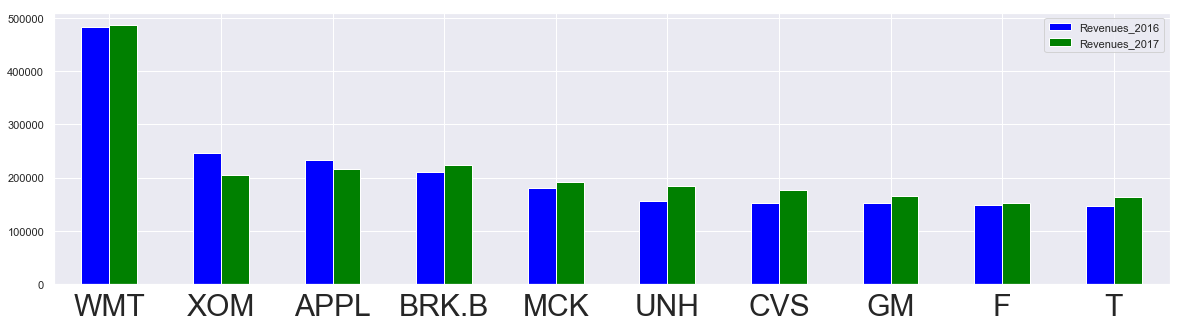

In [86]:
colors = ["blue", "green"]
multi_plot = stock_revenue_compare.plot(kind="bar", figsize=(20,5), color=colors)
plt.xticks(tick_locations, stock_revenue_compare["Ticker"], rotation="horizontal", fontsize=(30))
plt.savefig("Resources/Top10_Combined_Revenue.png")

In [93]:
ticker_df = stock_revenue_compare.drop(columns={"Revenues_2016", "Revenues_2017"})
ticker_df = ticker_df.set_index("Ticker")
ticker_df.to_html('table.html')
ticker_df

,Company
Ticker,
WMT,Walmart
XOM,Exxon Mobil
APPL,Apple
BRK.B,Berkshire Hathaway
MCK,McKesson
UNH,UnitedHealth Group
CVS,CVS Health
GM,General Motors
F,Ford Motor
